In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import GeV

### Create element from old string format

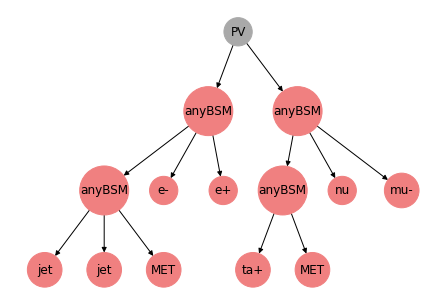

Name= 1110101101000110101101010000 
Process= (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),e-,e+), (anyBSM(2) > anyBSM(4),nu,mu-), (anyBSM(3) > jet,jet,MET), (anyBSM(4) > ta+,MET)
[(PV, 0), (anyBSM, 1), (anyBSM, 2), (anyBSM, 3), (e-, 4), (e+, 5), (anyBSM, 6), (nu, 7), (mu-, 8), (jet, 9), (jet, 10), (MET, 11), (ta+, 12), (MET, 13)]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anyBSM), (anyBSM, e-), (anyBSM, e+), (anyBSM, anyBSM), (anyBSM, nu), (anyBSM, mu-), (anyBSM, jet), (anyBSM, jet), (anyBSM, MET), (anyBSM, ta+), (anyBSM, MET)]


In [2]:
elementStr = "[[['e+','e-'],['jet','jet']],[['mu-','nu'],['ta+']]]"
el = Element(info=elementStr)
el.drawTree()
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

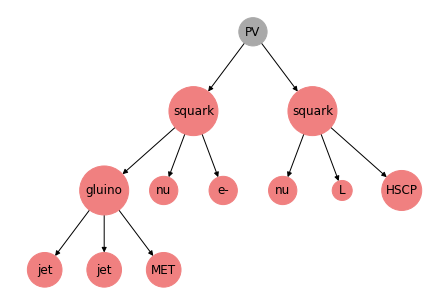

Name= 111010100110101101010000 
Process= (PV > squark(1),squark(2)), (squark(1) > gluino(3),nu,e-), (squark(2) > nu,L,HSCP), (gluino(3) > jet,jet,MET)
[(PV, 0), (squark, 1), (squark, 2), (gluino, 3), (nu, 4), (e-, 5), (nu, 6), (L, 7), (HSCP, 8), (jet, 9), (jet, 10), (MET, 11)]
[(PV, squark), (PV, squark), (squark, gluino), (squark, nu), (squark, e-), (squark, nu), (squark, L), (squark, HSCP), (gluino, jet), (gluino, jet), (gluino, MET)]


In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
finalStates=['MET','HSCP']
intermediateStates=[['squark','gluino'],['squark']]
el = Element(info=stringEl,finalState=finalStates,intermediateState=intermediateStates)
el.drawTree()
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

### Create element from new string format

In [4]:
elementStr = str(el)
print(elementStr)

(PV > squark(1),squark(2)), (squark(1) > gluino(3),nu,e-), (squark(2) > nu,L,HSCP), (gluino(3) > jet,jet,MET)


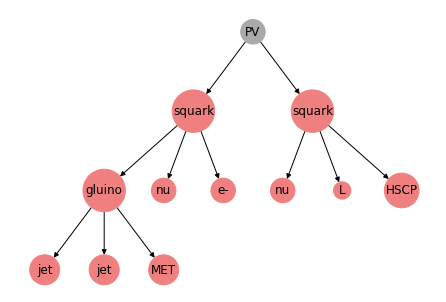

Name= 111010100110101101010000 
Process= (PV > squark(1),squark(2)), (squark(1) > gluino(3),nu,e-), (squark(2) > nu,L,HSCP), (gluino(3) > jet,jet,MET)
[(PV, 0), (squark, 1), (squark, 2), (gluino, 3), (nu, 4), (e-, 5), (nu, 6), (L, 7), (HSCP, 8), (jet, 9), (jet, 10), (MET, 11)]
[(PV, squark), (PV, squark), (squark, gluino), (squark, nu), (squark, e-), (squark, nu), (squark, L), (squark, HSCP), (gluino, jet), (gluino, jet), (gluino, MET)]


In [5]:
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

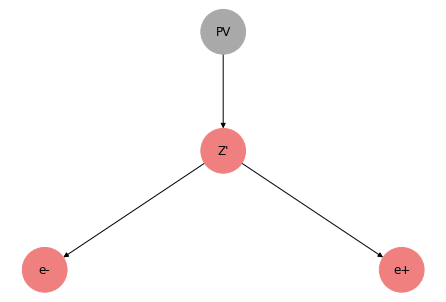

Name= 11101000 
Process= (PV > Z'(1)), (Z'(1) > e-,e+)
[(PV, 0), (Z', 1), (e-, 2), (e+, 3)]
[(PV, Z'), (Z', e-), (Z', e+)]


In [6]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > e+, e-)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

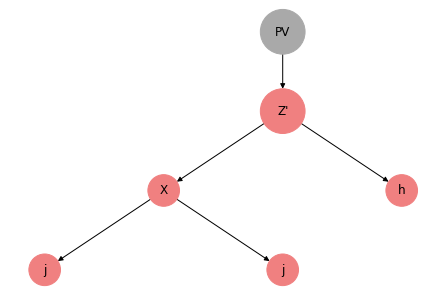

Name= 111011010000 
Process= (PV > Z'(1)), (Z'(1) > X(2),h), (X(2) > j,j)
[(PV, 0), (Z', 1), (X, 2), (h, 3), (j, 4), (j, 5)]
[(PV, Z'), (Z', X), (Z', h), (X, j), (X, j)]


In [7]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > X(2), h), (X(2) > j,j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

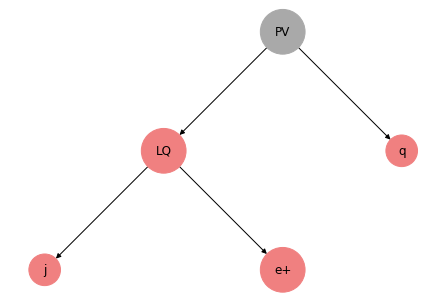

Name= 1101101000 
Process= (PV > LQ(1),q), (LQ(1) > j,e+)
[(PV, 0), (LQ, 1), (q, 2), (j, 3), (e+, 4)]
[(PV, LQ), (PV, q), (LQ, j), (LQ, e+)]


In [8]:
elementStr = proc = "(PV > q,LQ(1)), (LQ(1) > e+, j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.getCanonName(),'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

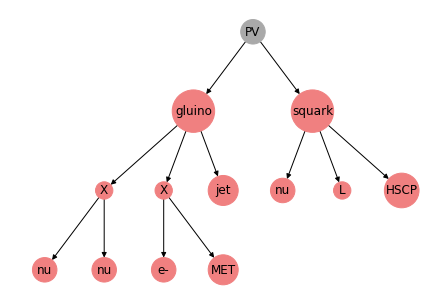

Name= 11101010011011010011010000
[(PV, 0), (gluino, 1), (squark, 2), (X, 3), (X, 4), (jet, 5), (nu, 6), (L, 7), (HSCP, 8), (nu, 9), (nu, 10), (e-, 11), (MET, 12)]
[(PV, gluino), (PV, squark), (gluino, X), (gluino, X), (gluino, jet), (squark, nu), (squark, L), (squark, HSCP), (X, nu), (X, nu), (X, e-), (X, MET)]


In [9]:
elementStr = proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.getCanonName())
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [10]:
print(el)

(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > nu,L,HSCP), (X(3) > nu,nu), (X(4) > e-,MET)


### Create element using a model

In [11]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


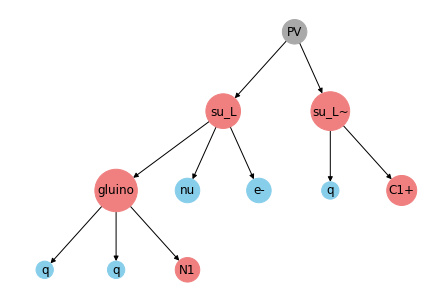

[PV, su_L, su_L~, gluino, nu, e-, q, C1+, q, q, N1]
[(PV, 0), (su_L, 1), (su_L~, 2), (gluino, 3), (nu, 4), (e-, 5), (q, 6), (C1+, 7), (q, 8), (q, 9), (N1, 10)]
[(PV, su_L), (PV, su_L~), (su_L, gluino), (su_L, nu), (su_L, e-), (su_L~, q), (su_L~, C1+), (gluino, q), (gluino, q), (gluino, N1)]


In [12]:
stringEl = "(PV > su_L(1),su_L~(2)), (su_L(1) > gluino(3),e-,nu), (su_L~(2) > C1+,d), (gluino(3) > N1,u,u~)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print(el.tree.nodes)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

#### Draw tree using distinct property for labels

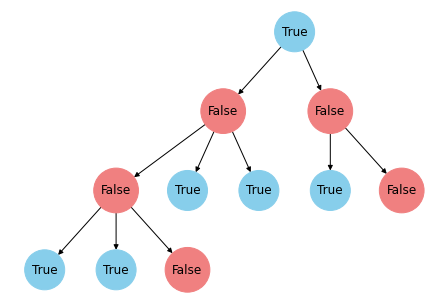

In [13]:
el.drawTree(nodeScale=4,labelAttr='isSM')

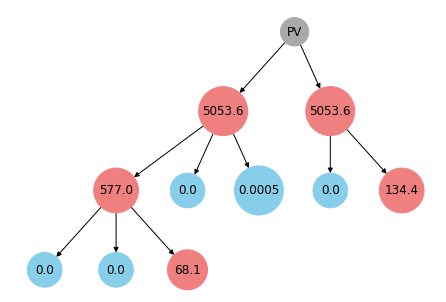

In [14]:
el.drawTree(nodeScale=4,labelAttr='mass',attrUnit=GeV)

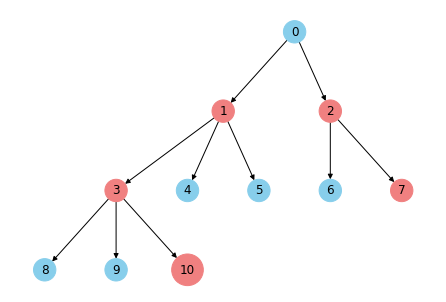

In [15]:
el.drawTree(nodeScale=5,labelAttr='node')

#### Convert to old bracket notation

In [16]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

[[['nu', 'e-'], ['q', 'q']], [['q']]]
['N1', 'C1+']
[['su_L', 'gluino'], ['su_L~']]


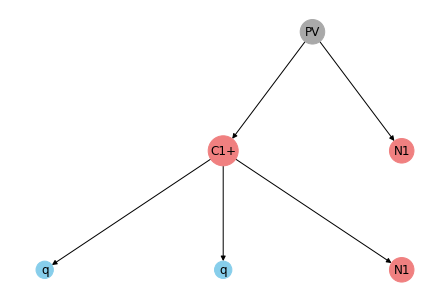

[(PV, 0), (C1+, 1), (N1, 2), (q, 3), (q, 4), (N1, 5)]
[(PV, C1+), (PV, N1), (C1+, q), (C1+, q), (C1+, N1)]


In [17]:
stringEl = "(PV > N1,C1+(1)), (C1+(1) > N1,u,d)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [18]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

[[['q', 'q']], []]
['N1', 'N1']
[['C1+'], []]


### Get attributes from nodes

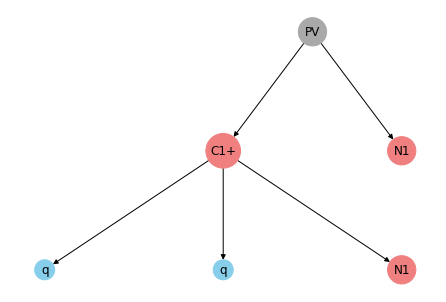

[(PV, 0), (C1+, 1), (N1, 2), (q, 3), (q, 4), (N1, 5)]
[(PV, C1+), (PV, N1), (C1+, q), (C1+, q), (C1+, N1)]


In [19]:
el.drawTree()
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [20]:
masses = list(zip(el.tree.nodes(),el.mass))
print(masses)

[(PV, None), (C1+, 1.34E+02 [GeV]), (N1, 6.81E+01 [GeV]), (q, 0.00E+00 [MeV]), (q, 0.00E+00 [MeV]), (N1, 6.81E+01 [GeV])]


In [21]:
pdgs = list(zip(el.tree.nodes(),el.pdg))
print(pdgs)

[(PV, None), (C1+, 1000024), (N1, 1000022), (q, [-2, 1, 3, -1, -3, 2]), (q, [-2, 1, 3, -1, -3, 2]), (N1, 1000022)]


In [22]:
Z2parity = list(zip(el.tree.nodes(),el.isSM))
print(Z2parity)

[(PV, None), (C1+, False), (N1, False), (q, True), (q, True), (N1, False)]


In [23]:
# Final states:
print(el.getFinalStates())

[N1, q, q, N1]
